In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [14]:
# loading data
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):

    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    
    # features and labels
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

In [15]:
# load traininf data
cifar10_path = 'cifar-10-batches-py'

x_train, y_train = load_cfar10_batch(cifar10_path, 1)
for i in range(2, 6):
    features, labels = load_cfar10_batch(cifar10_path, i)
    x_train, y_train = np.concatenate([x_train, features]), np.concatenate([y_train, labels])

In [16]:
# load test data
with open(cifar10_path + '/test_batch', mode='rb') as file:
    batch = pickle.load(file, encoding='latin1')
    x_test = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    y_test = batch['labels']

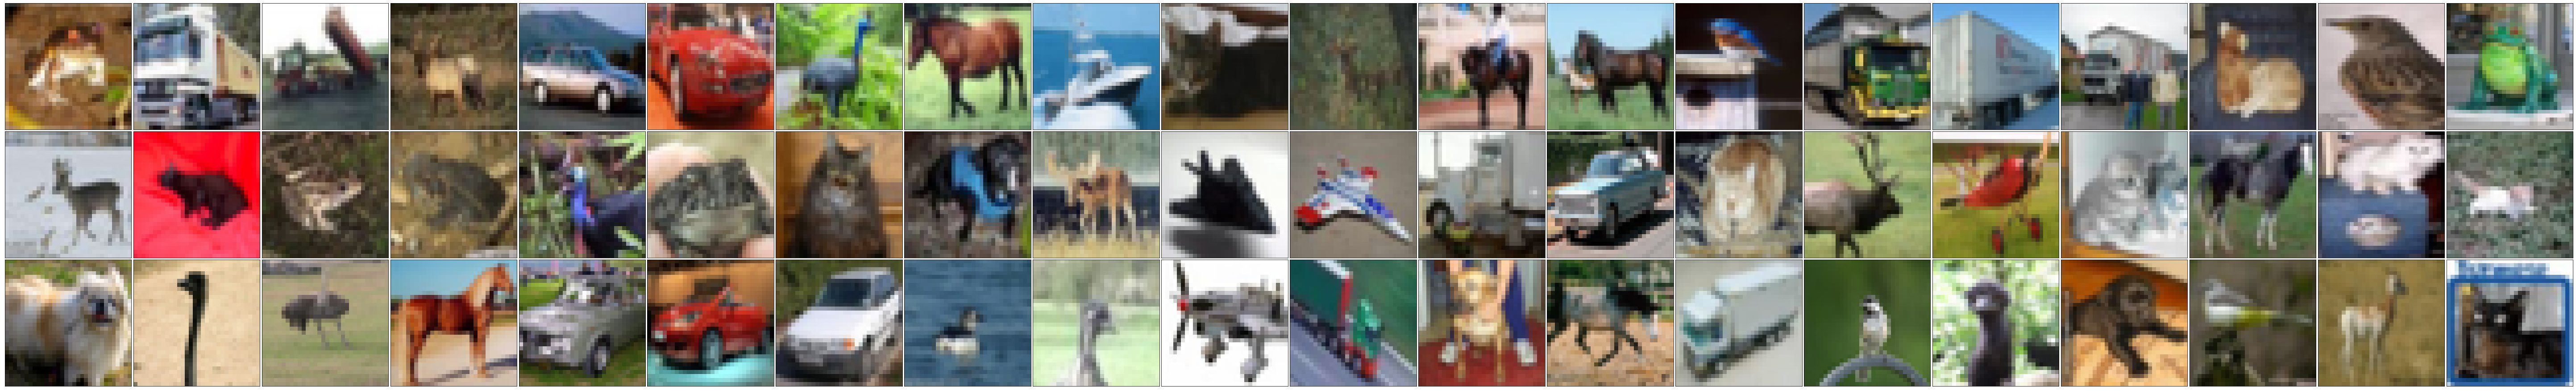

In [17]:
# show images
fig, axes = plt.subplots(nrows=3, ncols=20, sharex=True, sharey=True, figsize=(80,12))
imgs = x_train[:60]

for image, row in zip([imgs[:20], imgs[20:40], imgs[40:60]], axes):
    for img, ax in zip(image, row):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)


In [18]:
# data reshape
x_train_rows = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_test_rows = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

# scale the pixels of images
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

x_train_rows = minmax.fit_transform(x_train_rows)
x_test_rows = minmax.fit_transform(x_test_rows)

# Modeling

In [19]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Iteratively explore how much k is appropriate
# K = 1, 3, 5 to see the model to find what K value is better
k = [1, 3, 5]
for i in k:
    model = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree', n_jobs=6)
    model.fit(x_train_rows, y_train)
    preds = model.predict(x_test_rows)
    print('k = %s, Accuracy = %f' % (i, np.mean(y_test==preds)))

k = 1, Accuracy = 0.353900
k = 3, Accuracy = 0.330300
k = 5, Accuracy = 0.339800
